In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow import keras
from keras import layers
import matplotlib.image as img

%matplotlib inline

In [4]:
!pip install split-folders


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python312\\Scripts\\split-folders.exe' -> 'C:\\Python312\\Scripts\\split-folders.exe.deleteme'


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import splitfolders
splitfolders.ratio('C:\\Users\\akush\\Downloads\\Tyre', output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 504 files [00:00, 543.10 files/s]


In [6]:
import tensorflow as tf

# Enhanced data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,          # Randomly rotate the image (max rotation in degrees)
    width_shift_range=0.2,     # Randomly shift the image horizontally
    height_shift_range=0.2,    # Randomly shift the image vertically
    shear_range=0.2,           # Shear angle in counter-clockwise direction (in degrees)
    zoom_range=0.2,            # Randomly zoom in and out
    horizontal_flip=True,      # Randomly flip the image
    fill_mode='nearest',       # Fill strategy for newly created pixels
    brightness_range=(0.7, 1.3) # Randomly adjust brightness
)




train_generator = datagen.flow_from_directory(
    './output/train',
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical'
)

# For validation and testing, usually no augmentation is applied
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './output/val',
    seed=123,
    image_size=(128, 128),
    batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './output/test',
    seed=123,
    image_size=(128, 128),
    batch_size=64
)



Found 401 images belonging to 4 classes.
Found 49 files belonging to 4 classes.
Found 52 files belonging to 4 classes.


In [7]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(128, 128),
batch_size=64
)
# seed: to initialize the random number generator'
# batch_size: number of samples processed before the model is updated

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(128, 128),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(128, 128),
batch_size=64
)


Found 401 files belonging to 4 classes.
Found 52 files belonging to 4 classes.
Found 49 files belonging to 4 classes.


In [8]:
class_names = train_ds.class_names
print(class_names)

['class_1', 'class_2', 'class_3', 'templates']


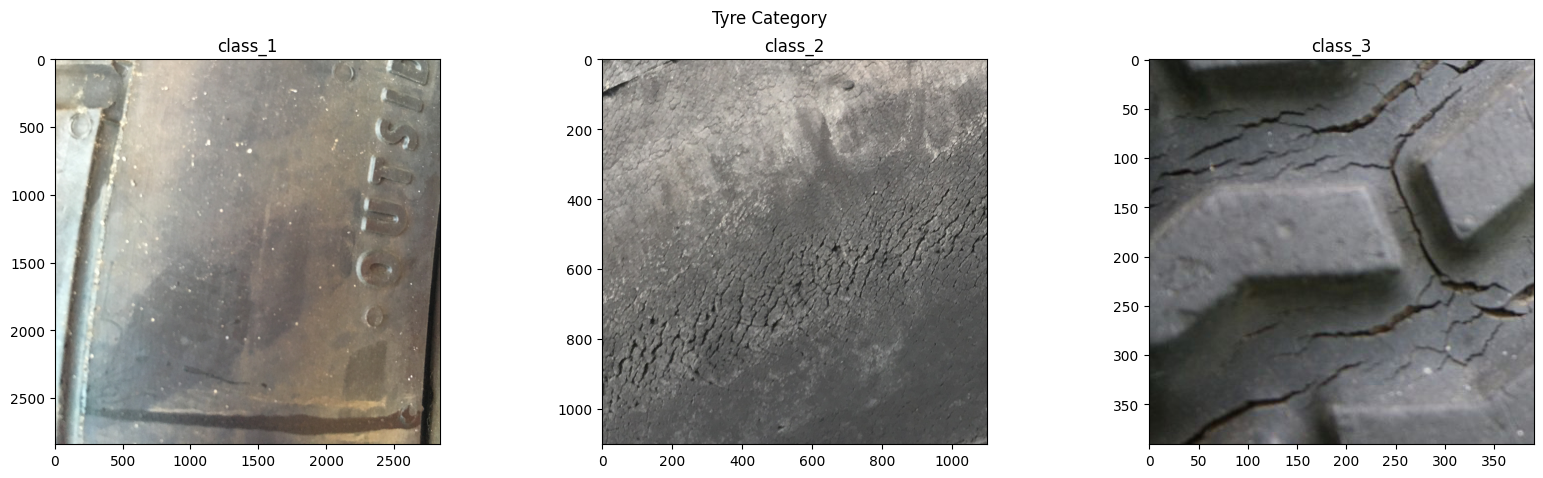

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))
fig.suptitle('Tyre Category')
class_1_img = img.imread("C:\\Users\\akush\\Downloads\\Tyre\\class_1\\Normal (400).jpg")
class_2_img = img.imread("C:\\Users\\akush\\Downloads\\Tyre\\class_2\\Untitled-47.jpg")
class_3_img = img.imread("C:\\Users\\akush\\Downloads\\Tyre\\class_3\\Cracked-8.jpg")


ax[0].set_title('class_1')
ax[1].set_title('class_2')
ax[2].set_title('class_3')

ax[0].imshow(class_1_img)
ax[1].imshow(class_2_img)
ax[2].imshow(class_3_img)

In [11]:
model = tf.keras.models.Sequential()
# The sequential API allows you to create models layer-by-layer for most problems.
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), input_shape=(128,128,1),activation='relu',kernel_initializer="he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer="he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer="he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer="he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer="he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(30,"softmax"))
model.add(tf.keras.layers.Dense(5,"softmax"))


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True
)

# Use the Adam optimizer with learning rate scheduling
optimiser = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [13]:
#model.compile(loss="sparse_categorical_crossentropy",
#              optimizer = "RMSprop",metrics=["accuracy"])
model.compile(loss="sparse_categorical_crossentropy", optimizer = optimiser ,metrics=["accuracy"])

In [14]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=50, batch_size=64, verbose=1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 699ms/step - accuracy: 0.5204 - loss: 1.5577 - val_accuracy: 0.7551 - val_loss: 1.5357
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 644ms/step - accuracy: 0.7508 - loss: 1.4677 - val_accuracy: 0.7551 - val_loss: 1.4749
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 674ms/step - accuracy: 0.7470 - loss: 1.4113 - val_accuracy: 0.7551 - val_loss: 1.4224
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 641ms/step - accuracy: 0.7462 - loss: 1.3656 - val_accuracy: 0.7551 - val_loss: 1.3828
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 701ms/step - accuracy: 0.7311 - loss: 1.3327 - val_accuracy: 0.7551 - val_loss: 1.3451
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 780ms/step - accuracy: 0.7361 - loss: 1.2990 - val_accuracy: 0.7551 - val_loss: 1.2959
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 753ms/step - accuracy: 0.7584 - loss: 1.2685 - val_accuracy: 0.7551 - val_loss: 1.2526
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 693ms/step - accuracy: 0.7390 - loss: 1.2423 - val_accuracy: 0.7551 - val_loss

In [15]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

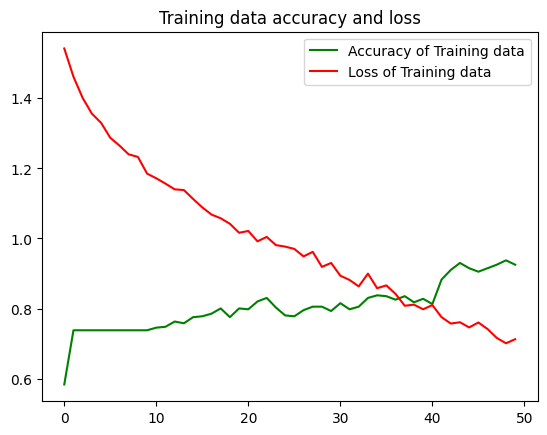

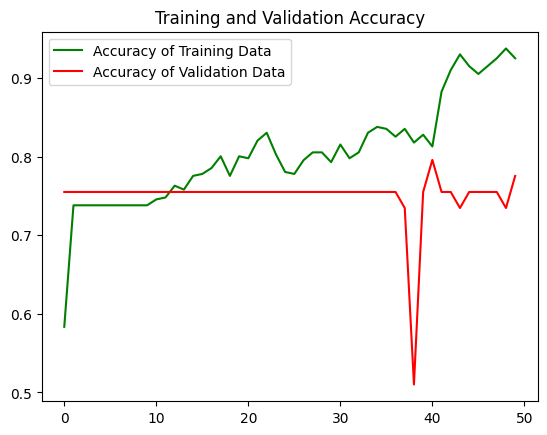

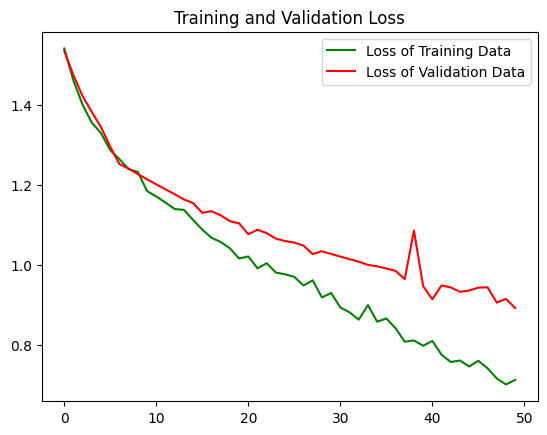

<Figure size 640x480 with 0 Axes>

In [16]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [17]:
loss, accuracy = model.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.7500 - loss: 0.9547


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
tf.Tensor([0.29286835 0.18071404 0.17367943 0.17903866 0.1736995 ], shape=(5,), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
tf.Tensor([0.2928485  0.18072447 0.1736832  0.17904092 0.17370291], shape=(5,), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
tf.Tensor([0.2918092  0.1812715  0.17388034 0.17915776 0.17388116], shape=(5,), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
tf.Tensor([0.2928668  0.18071465 0.17367977 0.17903893 0.17369981], shape=(5,), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
tf.Tensor([0.29286832 0.18071407 0.17367943 0.17903867 0.1736995 ], shape=(5,), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
tf.Tensor([0.29269257 0.18080682 0.17371263 0.17905842 0.17372961], shape=(5,), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

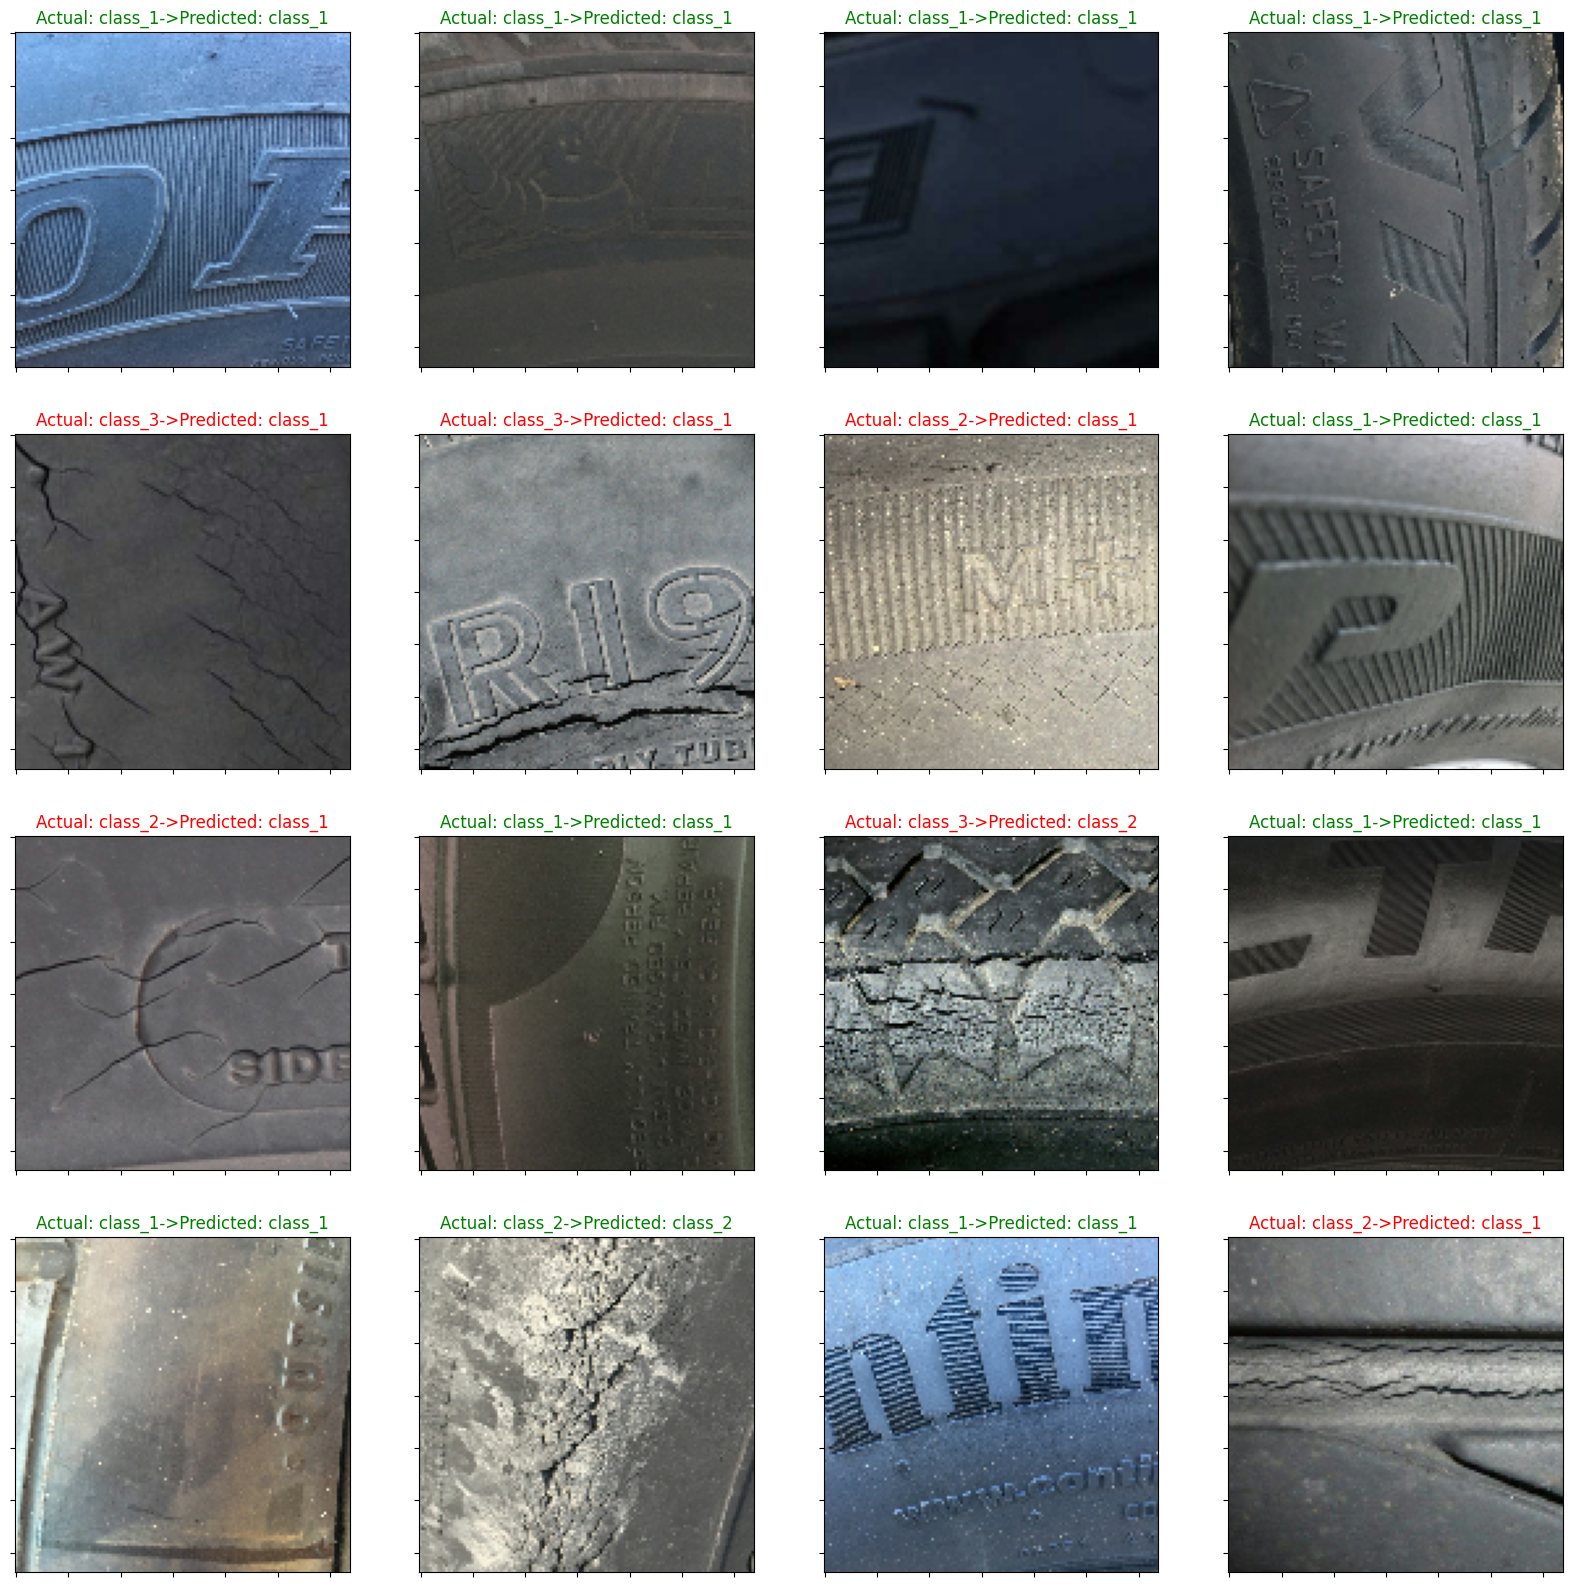

In [18]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]]+"->Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            print(score)

        else:
            plt.title("Actual: "+class_names[labels[i]]+"->Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

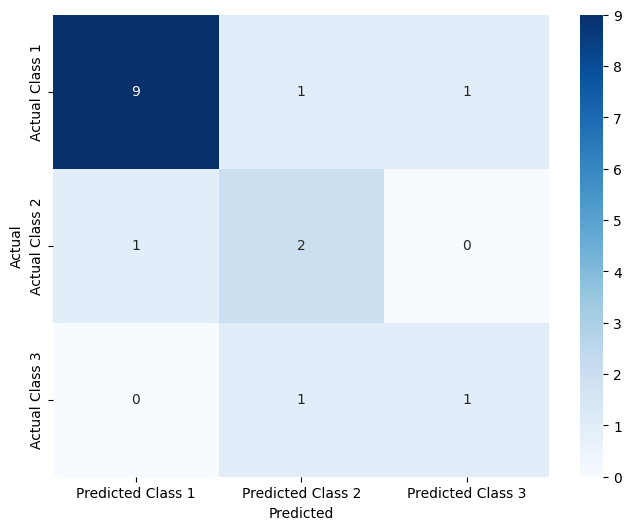

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sample 'true_labels' and 'predicted_labels'
true_labels = [1,1,1,1,2,1,2,3,1,1,1,1,3,1,1,2]
predicted_labels = [1,1,1,1,2,3,1,2,1,1,1,2,3,1,1,2]

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Class 1', 'Predicted Class 2', 'Predicted Class 3'],
            yticklabels=['Actual Class 1', 'Actual Class 2', 'Actual Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [20]:
model.save('C:\\Users\\akush\\Downloads\\Tyre\\model.h5')
